In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

import numpy as np
np.set_printoptions(precision=5, suppress=True)

# 1. Set rcParams

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['axes.linewidth'] = 0.5

plt.rcParams["figure.dpi"] = 300

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# 2. Set up grid

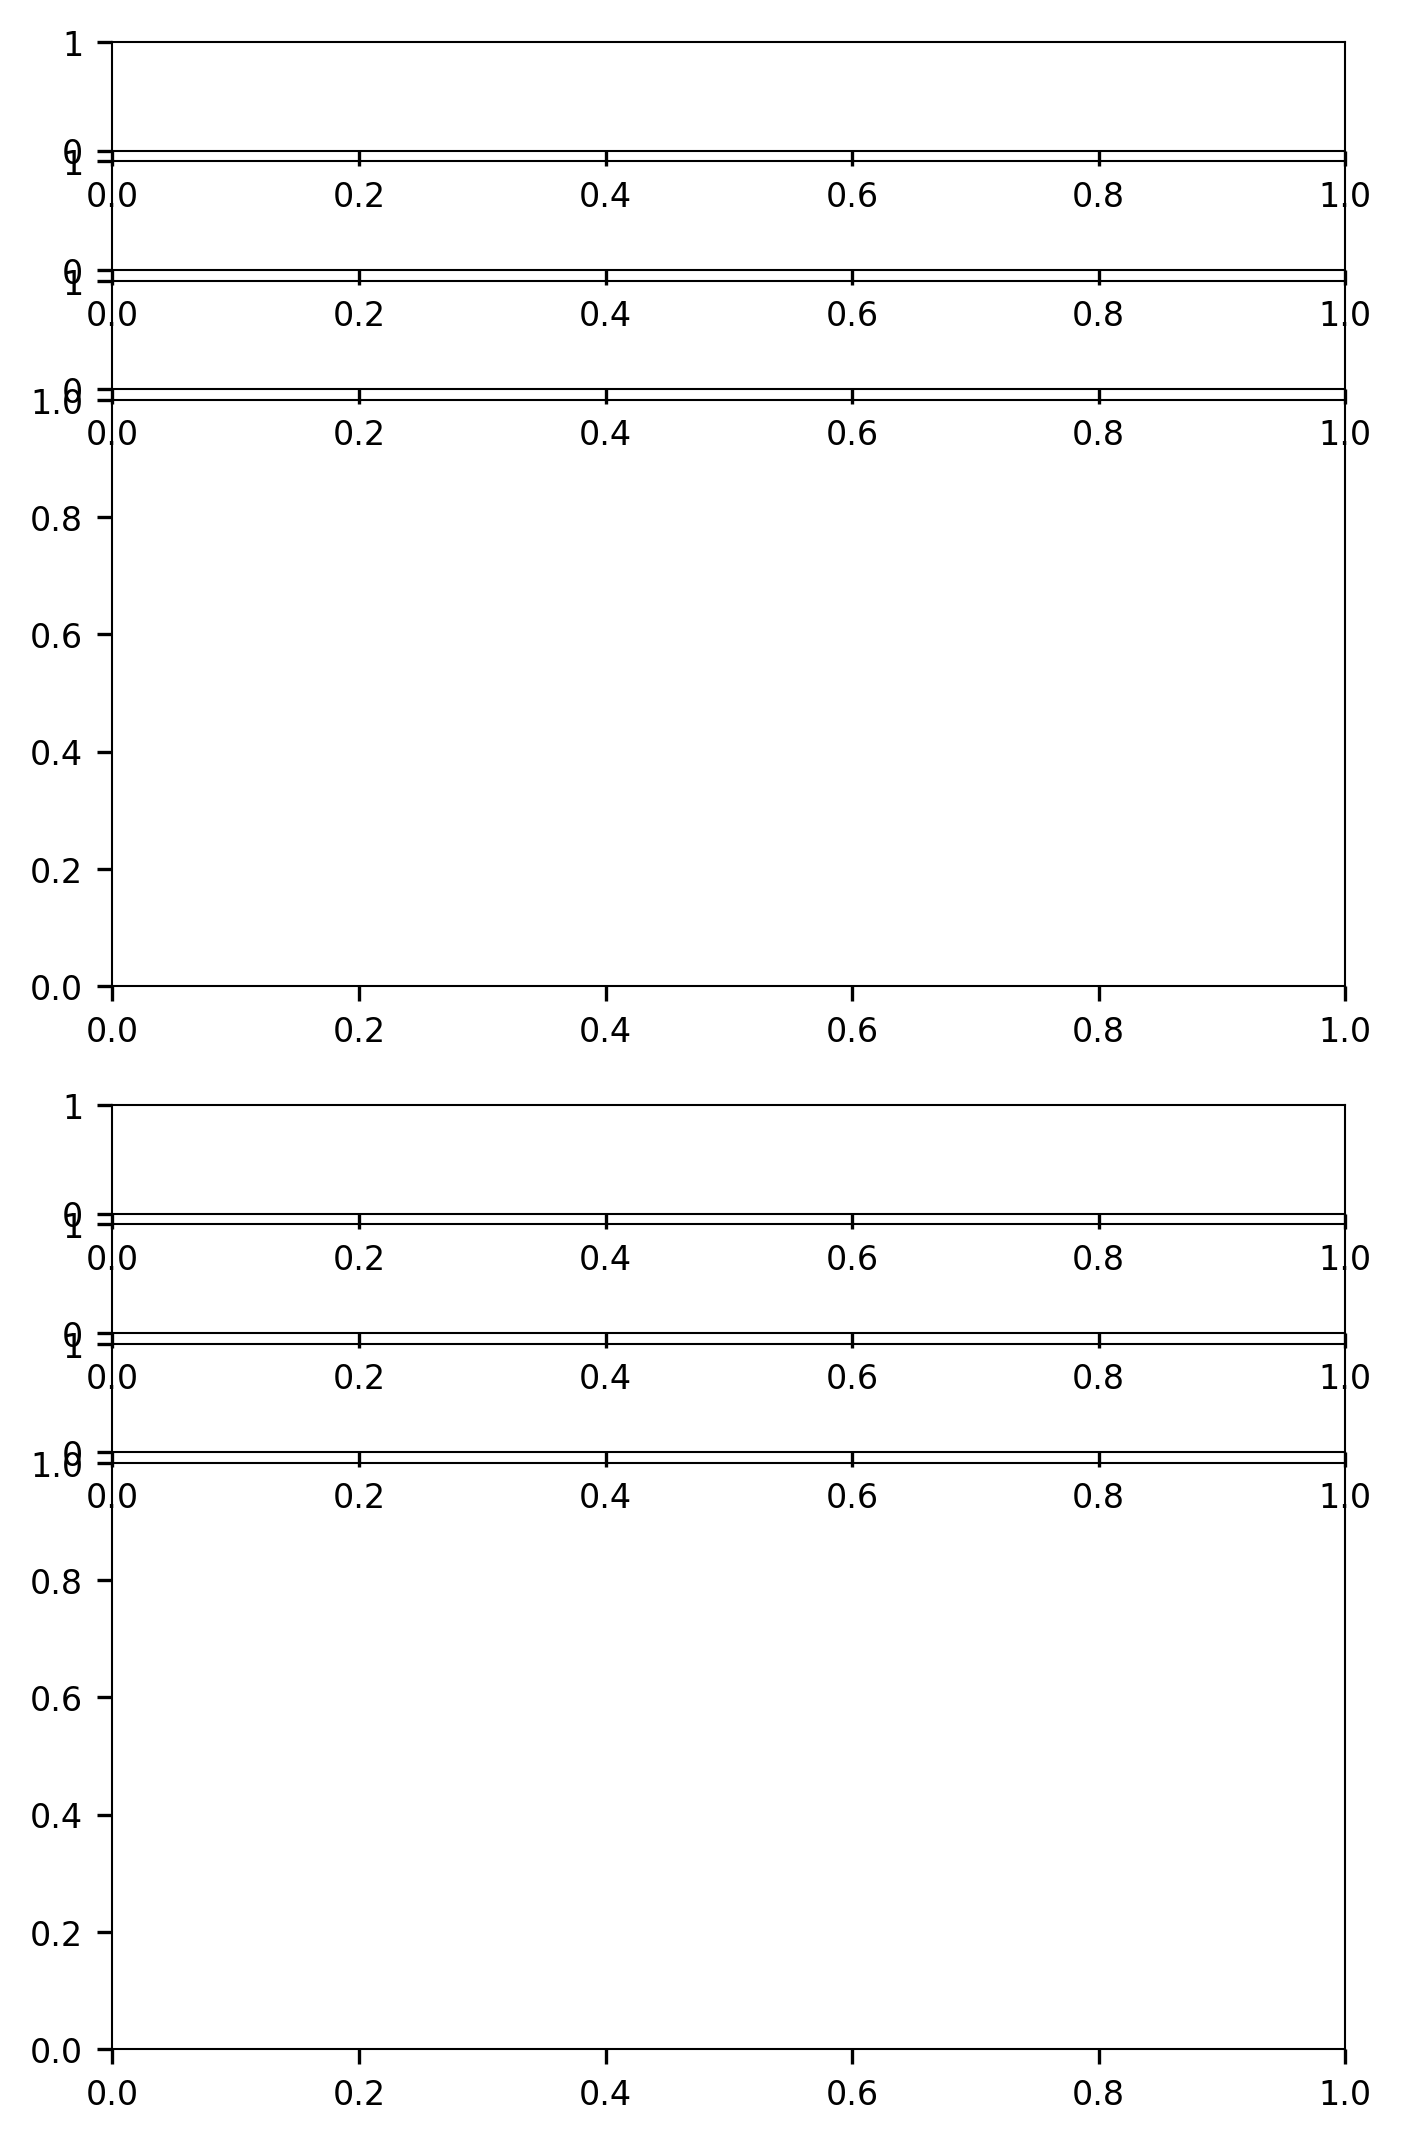

In [3]:
width = 116 / 25.4
height = 200 / 25.4
fig3 = plt.figure(constrained_layout=False, figsize=(width, height))
#fig3 = plt.figure(sharex=True, figsize=(width, height))
gs1 = fig3.add_gridspec(9, 1, left=0.05, right=0.95, top=0.95, bottom=0.50, hspace=0.1)
f3_ax2 = fig3.add_subplot(gs1[3:8, :])
f3_ax1 = fig3.add_subplot(gs1[2, :])


gs2 = fig3.add_gridspec(9, 3, left=0.05, right=0.95, top=0.50, bottom=0.05, hspace=0.1)
f3_ax4 = fig3.add_subplot(gs2[3:8, :])
f3_ax3 = fig3.add_subplot(gs2[2, :])


# For client definitions
f3_ax5 = fig3.add_subplot(gs1[1, :])
f3_ax6 = fig3.add_subplot(gs2[1, :])

# For secondary structure
f3_ax7 = fig3.add_subplot(gs1[0, :])
f3_ax8 = fig3.add_subplot(gs2[0, :])


# 3. Read in data

In [4]:
# Read in data
resid_heatmap = pd.read_csv('../../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Get WTaa index positions and plot dots
aa_seq = src_utils.__aa_seq__
wt_aa_x_idx = np.zeros(len(aa_seq))
for idx, aa in enumerate(aa_seq):
    wt_aa_x_idx[idx] = src_utils.__aa_idx_dict__[aa]

# Set syn values to 0.0
syn_mask = np.zeros((250, 21))
for pos, idx in zip(np.arange(250), wt_aa_x_idx):
    syn_mask[pos, int(idx)] = 1.
syn_mask = syn_mask.astype(bool)
resid_heatmap.values[syn_mask] = 0.

# Set colormap NaNs to gray
current_cmap = matplotlib.cm.get_cmap('bwr')
current_cmap.set_bad(color='lightgrey')
divnorm = DivergingNorm(vmin=-2, vcenter=0, vmax=3)

## First row
#f3_ax2.imshow(resid_heatmap.T.values[:, :125], cmap='bwr', vmin=-3, vmax=3)
f3_ax2.pcolormesh(resid_heatmap.T.values[:, :125], cmap='bwr', norm=divnorm)
f3_ax2.scatter(np.arange(len(aa_seq))[:125] + 0.5, wt_aa_x_idx[:125] + 0.5, s=0.5, marker='.', c='k')
f3_ax2.set_ylim(f3_ax2.get_ylim()[::-1])

# Set ticks
f3_ax2.set_yticks(np.arange(21) + 0.5)
f3_ax2.set_yticklabels(list(src_utils.__aa_idx_dict__.keys()))
f3_ax2.set_xticks(np.array(list(src_utils.__pos_idx_dict__.values())[:125:10]) + 0.5)
f3_ax2.set_xticklabels(list(src_utils.__pos_idx_dict__.keys())[:125:10])

## Second row
#f3_ax4.imshow(resid_heatmap.T.values[:, 125:], cmap='bwr', vmin=-3, vmax=3)
f3_ax4.pcolormesh(resid_heatmap.T.values[:, 125:], cmap='bwr', norm=divnorm)
f3_ax4.scatter(np.arange(len(aa_seq))[:125] + 0.5, wt_aa_x_idx[125:] + 0.5, s=0.5, marker='.', c='k')
f3_ax4.set_ylim(f3_ax4.get_ylim()[::-1])

# Set ticks
f3_ax4.set_yticks(np.arange(21) + 0.5)
f3_ax4.set_yticklabels(list(src_utils.__aa_idx_dict__.keys()))
f3_ax4.set_xticks(np.array(list(src_utils.__pos_idx_dict__.values())[:125:10]) + 0.5)
f3_ax4.set_xticklabels(list(src_utils.__pos_idx_dict__.keys())[125::10])
f3_ax4.set_xlabel('Src catalytic domain position')


Text(0.5, 13.333333333333318, 'Src catalytic domain position')

# 4. Set up bar plots

In [5]:
def moving_average(a, n=4) :
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

pos_resid_ave = resid_heatmap.mean(axis=1, skipna=True).values
positions = np.arange(250)
windowed_resids = moving_average(pos_resid_ave)
windowed_positions = moving_average(positions)

In [6]:
window_idx = np.argwhere(windowed_positions > 125)[0][0]
lin_pos = np.linspace(0, 125, len(windowed_resids[:window_idx]))
f3_ax1.plot(lin_pos, windowed_resids[:window_idx], c='k')
x_lim = f3_ax2.get_xlim()
y_lim = (min(windowed_resids), max(windowed_resids))
f3_ax1.set_xlim(x_lim)
f3_ax1.set_ylim(y_lim)
f3_ax1.axhline(0, linewidth=0.5, c='grey')
#f3_ax1.axis('off')


lin_pos = np.linspace(0, 125, len(windowed_resids[window_idx:]))
f3_ax3.plot(lin_pos, windowed_resids[window_idx:], c='k')
f3_ax3.set_xlim(x_lim)
f3_ax3.set_ylim(y_lim)
f3_ax3.axhline(0, linewidth=0.5, c='grey')
#f3_ax3.axis('off')




In [7]:
# All residual values
resid_map = pd.read_csv('../../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Client masks
client_mask = np.loadtxt('../../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_client_mask = np.loadtxt('../../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_client_mask = np.loadtxt('../../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_client_mask = np.loadtxt('../../../utils/analysis_utils/dependent_clients.csv').astype(bool)

# Get number of inhibited and dependent
num_dep = np.sum(dep_client_mask * 1, axis=1)
num_ihb = np.sum(ihb_client_mask * 1, axis=1)
num_mut = np.sum(~np.isnan(resid_map.values), axis=1)

# Calculate percentage
perc_dep = 100 * (num_dep / num_mut)
perc_ihb = 100 * (num_ihb / num_mut)

cmap = matplotlib.cm.get_cmap('bwr')
dep = cmap(0.3)
ihb = cmap(0.8)

pos_arr = np.arange(250)
f3_ax5.bar(pos_arr[:125], perc_dep[:125], color=dep, label='Dependent clients')
f3_ax5.bar(pos_arr[:125], perc_ihb[:125], color=ihb, bottom=perc_dep[:125], label='Inhibited clients')
x_lim = f3_ax2.get_xlim()
f3_ax5.set_xlim(x_lim)

f3_ax6.bar(pos_arr[:125], perc_dep[125:], color=dep, label='Dependent clients')
f3_ax6.bar(pos_arr[:125], perc_ihb[125:], color=ihb, bottom=perc_dep[125:], label='Inhibited clients')
x_lim = f3_ax4.get_xlim()
f3_ax6.set_xlim(x_lim)
"""ax.set_xlabel('Position')
ax.set_ylabel('Percent client\nvariants')
ax.legend(loc=2)"""
"""ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)"""


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


"ax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)"

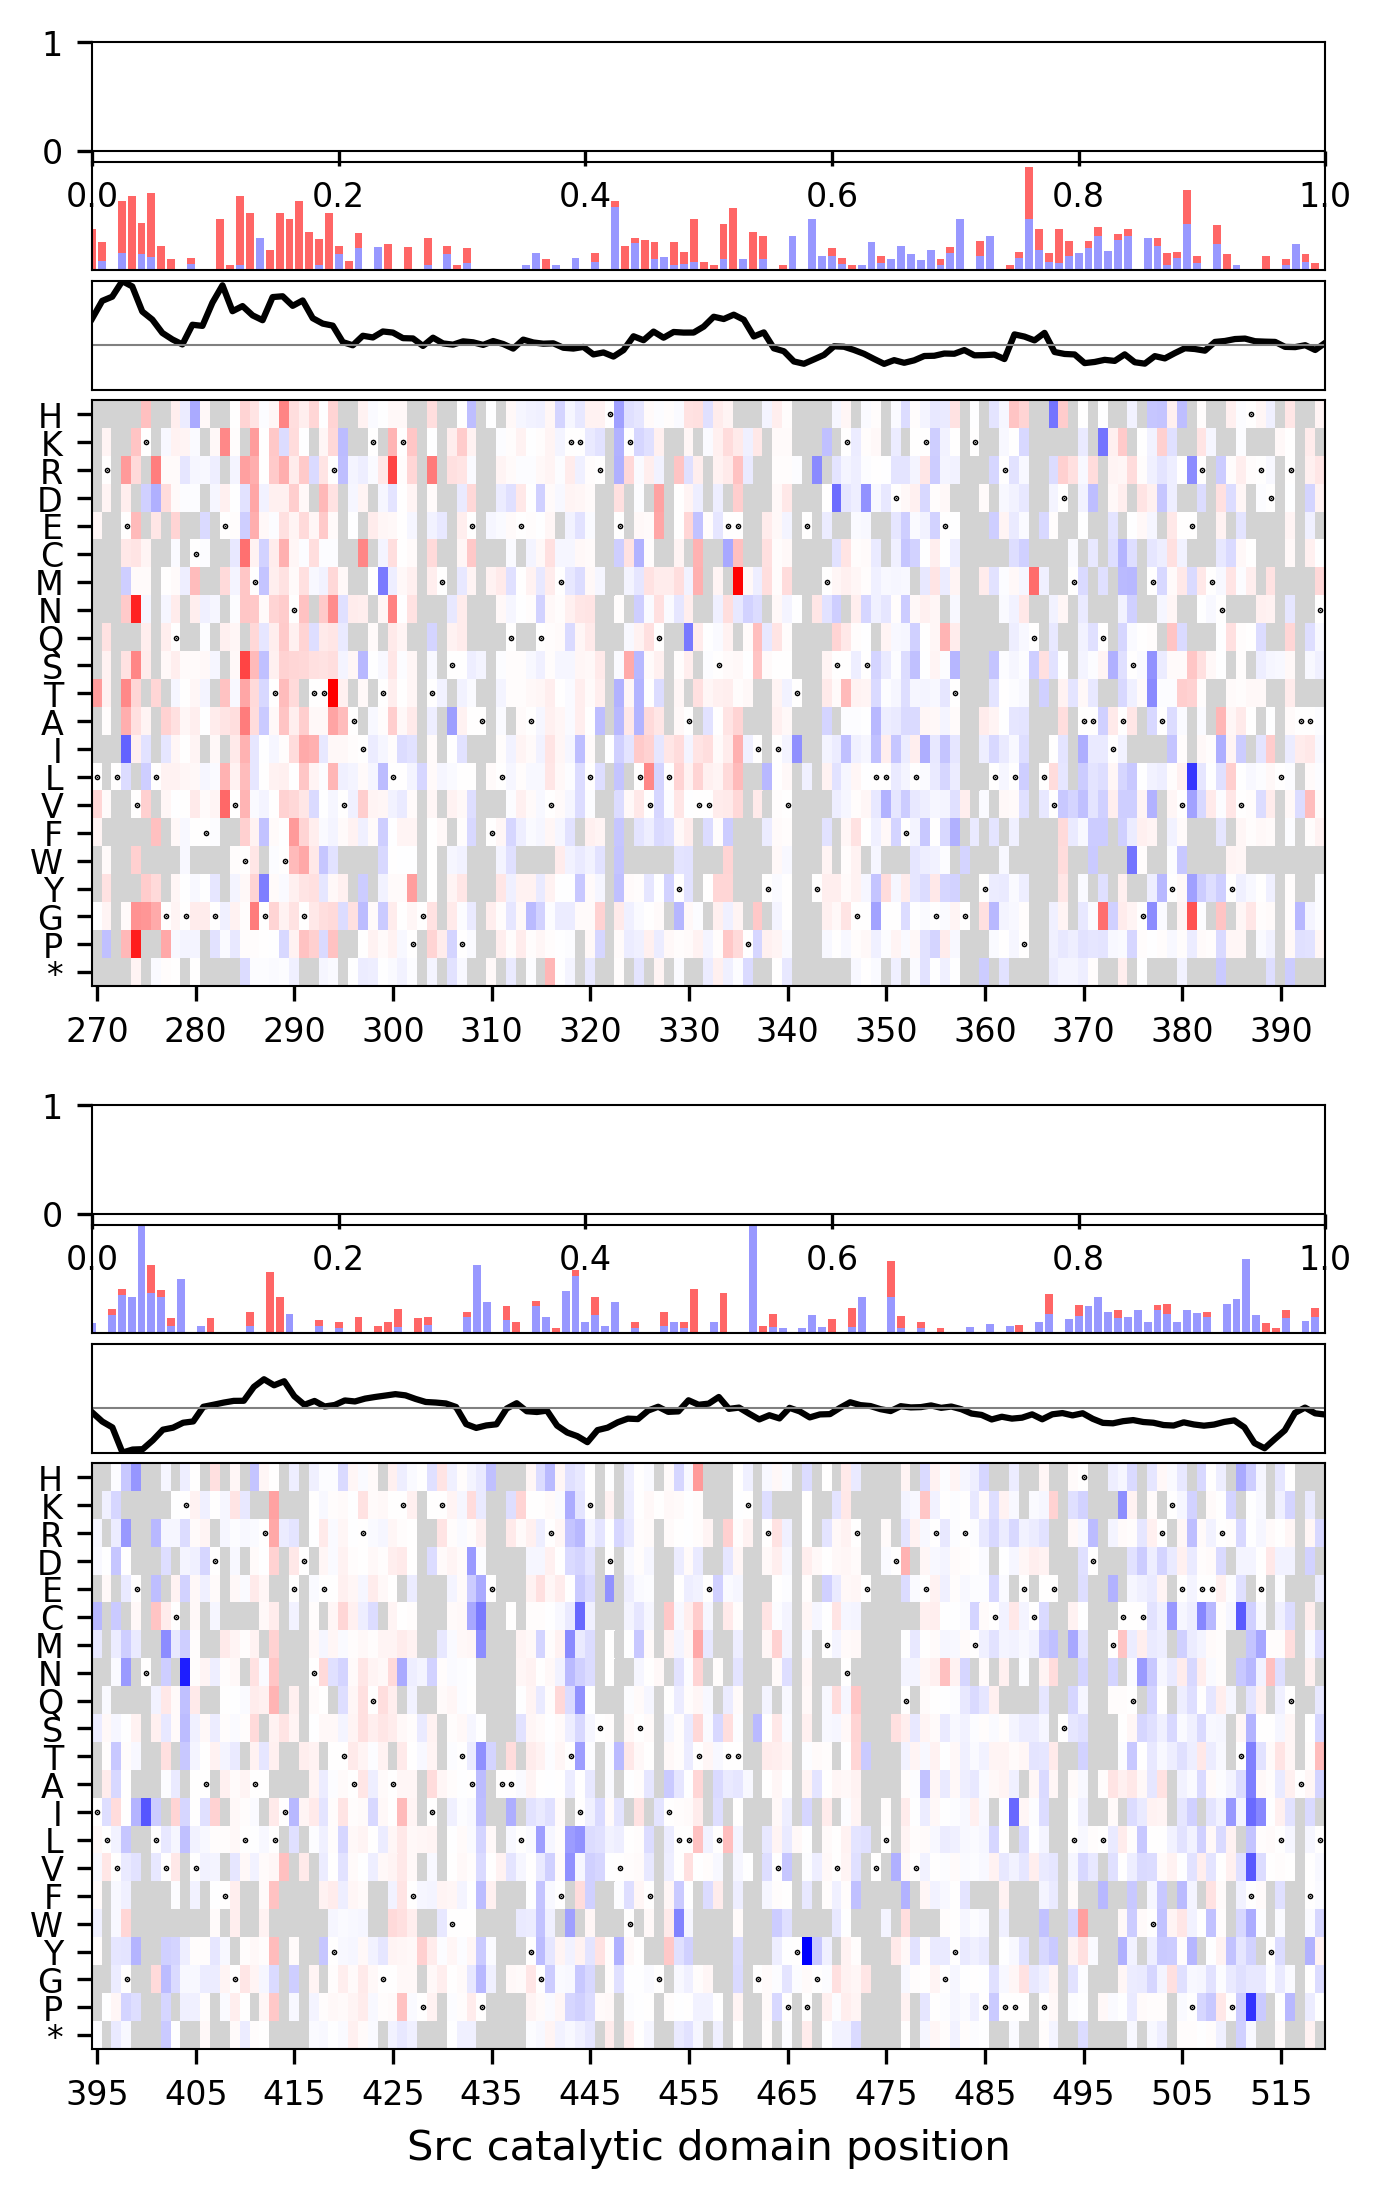

In [8]:
for ax in [f3_ax1, f3_ax3, f3_ax5, f3_ax6]:
    ax.set_xticks([], [])
    ax.set_yticks([], [])

fig3

In [9]:
# Testing secondary structure plotting
ss = src_utils.ss_elem
pos_idx_dict = src_utils.__pos_idx_dict__

# Create secondary structure array (2D so I can have a line through it)
ss_array = np.zeros((2, 250))

for elem, positions in ss.items():
    
    # Assign 1 if alpha, - 1 if beta
    if 'beta' in elem:
        val=-1
    else:
        val=1
    
    # Loop through positions and assign values
    for pos in positions:
        idx = pos_idx_dict[pos]
        ss_array[:, idx] = val
        
ss_array[ss_array == 0.0] = np.nan

In [10]:
current_cmap = matplotlib.cm.get_cmap('BrBG')
current_cmap.set_bad(color='white')
f3_ax7.pcolor(ss_array[:, :125], cmap='BrBG', vmin=-2, vmax=2)
f3_ax7.axis('off')


f3_ax8.pcolor(ss_array[:, 125:], cmap='BrBG', vmin=-2, vmax=2)
f3_ax8.axis('off')


(0.0, 125.0, 0.0, 2.0)

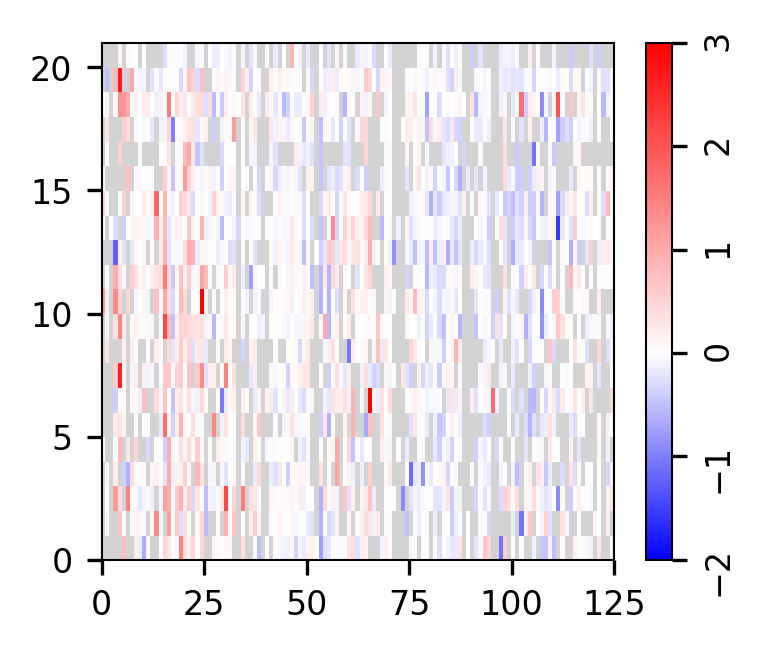

In [13]:
fig = plt.figure(figsize=(70/25.4, 58/25.4))
plt.pcolormesh(resid_heatmap.T.values[:, :125], cmap='bwr', norm=divnorm)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),rotation=90)
fig.savefig('../../../Figures/manuscript_figs/fig3_drafts/colorbar.png')

In [180]:
fig3.savefig('../../../Figures/manuscript_figs/fig3_drafts/f3_v8.png')

# Make PyMOL vals


In [211]:
np.nanmax(abs(resid_heatmap.values), axis=1)

array([1.17057, 0.49187, 0.     , 1.3911 , 2.66879, 1.23986, 1.50169,
       1.0187 , 0.50946, 0.19359, 0.77518, 0.28821, 0.23295, 1.77894,
       0.38078, 2.18513, 1.54446, 1.00656, 0.64194, 1.44492, 1.18693,
       1.02641, 0.92768, 0.83357, 3.0612 , 0.79087, 0.37222, 1.41911,
       0.23352, 1.03497, 2.20184, 0.28113, 1.13596, 0.31342, 1.56802,
       0.22742, 0.75555, 0.59013, 0.63932, 0.07902, 0.20998, 0.28414,
       0.32271, 0.26013, 0.53942, 0.3624 , 0.86444, 0.3429 , 0.2825 ,
       0.51358, 0.30956, 0.52066, 0.01518, 0.74842, 0.98902, 0.62367,
       1.39505, 1.09933, 0.35538, 0.69416, 1.05935, 0.93283, 0.39727,
       0.48008, 0.68541, 2.96833, 0.3492 , 0.75466, 0.55929, 0.31549,
       0.40259, 0.87108, 0.10954, 0.90925, 0.48575, 1.14923, 0.82011,
       0.33265, 0.84456, 0.73117, 0.59639, 0.44859, 0.44588, 0.49471,
       0.63634, 0.39067, 0.86865, 0.62323, 0.34314, 0.15677, 0.39418,
       0.55844, 0.21999, 0.6955 , 0.51236, 1.71869, 0.37266, 1.07851,
       0.58771, 0.37

In [217]:
max_client_score = []
for row in resid_heatmap.values:
    min_val = np.nanmin(row)
    max_val = np.nanmax(row)
    
    if abs(min_val) > abs(max_val):
        max_client_score.append(min_val)
    else:
        max_client_score.append(max_val)

max_client_score = np.array(max_client_score)
np.savetxt('../../../PyMOL/max_client_scores.txt', max_client_score)

In [169]:
# Save PyMOL commands for coloring by structure
client_scores = np.nanmean(resid_heatmap.values, axis=1)
print('run fowler/src/PyMOL/scripts/loadBfacts.py')
print('run fowler/src/PyMOL/scripts/alphaToAll.py')
print('cd fowler/src/PyMOL/')
print('loadBfacts 2src_kinDom, startaa = 270, source = client_scores.txt')
print('cmd.cartoon(\"automatic\")')
print('alphaToAll *, b')
print('spectrum b, palette=blue_white_red, minimum={:.2f}, maximum={:.2f}'.format(np.nanmin(client_scores), np.nanmax(client_scores)))
print('@./scripts/src_1.pml')
print('ray 800,1000')

run fowler/src/PyMOL/scripts/loadBfacts.py
run fowler/src/PyMOL/scripts/alphaToAll.py
cd fowler/src/PyMOL/
loadBfacts 2src_kinDom, startaa = 270, source = client_scores.txt
cmd.cartoon("automatic")
alphaToAll *, b
spectrum b, palette=blue_white_red, minimum=-0.66, maximum=0.80
@./scripts/src_1.pml


In [170]:
print('@./scripts/src_2.pml')
print('ray 800,1000')

@./scripts/src_2.pml
ray 800,1000


In [219]:
print('run fowler/src/PyMOL/scripts/loadBfacts.py')
print('run fowler/src/PyMOL/scripts/alphaToAll.py')
print('cd fowler/src/PyMOL/')
print('loadBfacts 2src_kinDom, startaa = 270, source = max_client_scores.txt')
print('cmd.cartoon(\"automatic\")')
print('alphaToAll *, b')
print('spectrum b, palette=blue_white_red, minimum={:.2f}, maximum={:.2f}'.format(np.nanmin(max_client_score), np.nanmax(max_client_score)))
print('@./scripts/src_1.pml')
#print('ray 800,1000')

run fowler/src/PyMOL/scripts/loadBfacts.py
run fowler/src/PyMOL/scripts/alphaToAll.py
cd fowler/src/PyMOL/
loadBfacts 2src_kinDom, startaa = 270, source = max_client_scores.txt
cmd.cartoon("automatic")
alphaToAll *, b
spectrum b, palette=blue_white_red, minimum=-2.16, maximum=3.06
@./scripts/src_1.pml
